# Task: Can you predict stress levels or personal achievements with ML?

The goal of this notebook is to use machine learning to rank important features for determining a person's daily stress and achievements. The notebook begins with descriptions of each feature, followed by a plot of the distributions of each feature. Next, the notebook shows feature weights using permeation importance. The final section of the notebook uses the model to predict a person's level of stress and achievement based on a user's input (one will need to fork the notebook to enter their own info).

Special thanks to:
* Yvon Dalat https://www.kaggle.com/ydalat for both the dataset and the task. 

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lifestyle-and-wellbeing-data/Wellbeing_and_lifestyle_data.csv


In [2]:
wellbeing = pd.read_csv('/kaggle/input/lifestyle-and-wellbeing-data/Wellbeing_and_lifestyle_data.csv')
print(wellbeing.shape)
print(list(wellbeing.columns))
wellbeing.head()

(12756, 23)
['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'DAILY_MEDITATION', 'AGE', 'GENDER']


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
0,7/7/15,3,2,2,5,0,5,2,0,1,...,0,7,5,5,1,4,0,5,36 to 50,Female
1,7/7/15,2,3,4,3,8,10,5,2,2,...,5,8,2,2,2,3,2,6,36 to 50,Female
2,7/7/15,2,3,3,4,4,10,3,2,2,...,5,8,10,2,2,4,8,3,36 to 50,Female
3,7/7/15,3,3,10,3,10,7,2,5,2,...,0,5,7,5,1,5,2,0,51 or more,Female
4,7/7/15,5,1,3,3,10,4,2,4,2,...,0,7,0,0,2,8,1,5,51 or more,Female


In [3]:
wellbeing = wellbeing.drop('Timestamp', axis=1)
wellbeing = wellbeing.drop([10005]) # This entry contained errors that needed to be corrected or erased
age_dict = {'Less than 20' : 1, '21 to 35' : 2, '36 to 50' : 3, '51 or more' : 4}
wellbeing['AGE'] = pd.Series([age_dict[x] for x in wellbeing.AGE], index=wellbeing.index)
gender_dict = {'Female' : 1, 'Male' : 0}
wellbeing['GENDER'] = pd.Series([gender_dict[x] for x in wellbeing.GENDER], index=wellbeing.index)
wellbeing['DAILY_STRESS'] = wellbeing['DAILY_STRESS'].astype(int)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Distribution and Description

This section contains plots of the distributions and the description of each feature. Descriptions are copied from the survey questions themselves. Starting first with our two target variables, Achievement and Stress.

### Achievement

HOW MANY REMARKABLE ACHIEVEMENTS ARE YOU PROUD OF? * ► Over the last 12 months, personal achievements known to your family, close friends or co-workers such as: running a marathon or important race, birth, successful kids, new house or major renovation, major success at work, opening a new business...

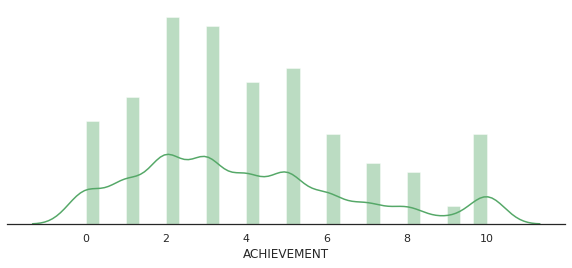

In [5]:
sns.set(style="white")

plt.figure(figsize=(10,4))
sns.distplot(wellbeing['ACHIEVEMENT'], hist=True, color="g").set_yticks([])
sns.despine(bottom=False, left=True)

### Daily Stress
HOW MUCH STRESS DO YOU TYPICALLY EXPERIENCE EVERYDAY? * ► At work or at home, due to the environment (noise, pollution, insecurity...), your co-workers or boss, or because of tragic events such as divorce, job loss, serious illness, loss of family or friends,... ► In average over 12 months.


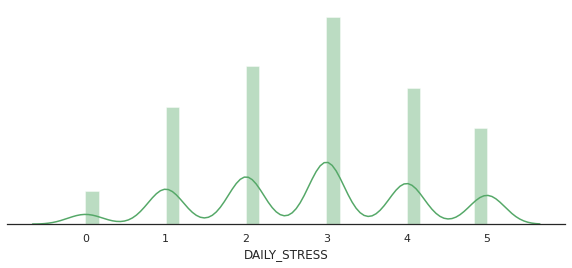

In [6]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['DAILY_STRESS'], hist=True, rug=False, color="g").set_yticks([])
sns.despine(bottom=False, left=True)

### Daily Steps

HOW MANY STEPS (IN THOUSANDS) DO YOU TYPICALLY WALK EVERYDAY? * ► Thousand steps, daily average over multiple days including work days and week-end.

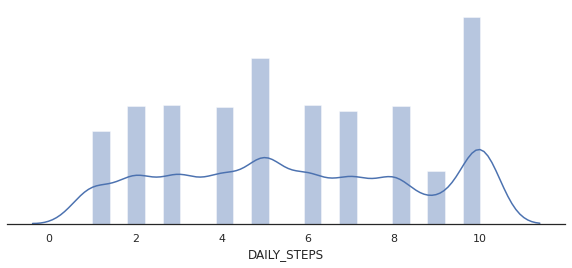

In [7]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['DAILY_STEPS'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Fruits and Veggies
HOW MANY FRUITS OR VEGETABLES DO YOU EAT EVERYDAY? * ► In a typical day, averaging workdays and weekends. Select 5 if more than 5.

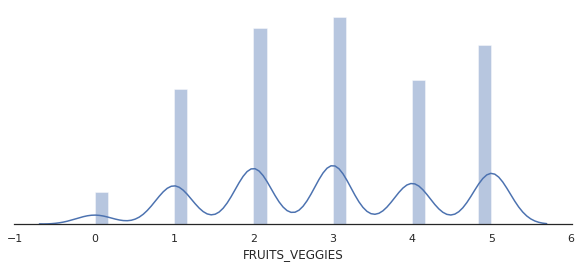

In [8]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['FRUITS_VEGGIES'], hist=True, rug=False).set_yticks([])
sns.despine(bottom=False, left=True)

### Places Visited
HOW MANY NEW PLACES DO YOU VISIT? * ► Over a period of 12 months. Include new states, new cities as well as museum, places of interest and parks in your neighborhood.

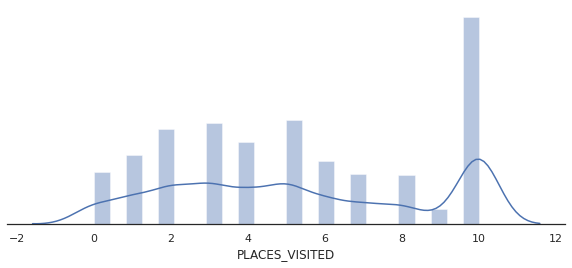

In [9]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['PLACES_VISITED'], hist=True, rug=False).set_yticks([])
sns.despine(bottom=False, left=True)

### Core Circle

HOW MANY PEOPLE ARE VERY CLOSE TO YOU? * ► i.e. close family and friends ready to provide you with a long-term unconditional support.

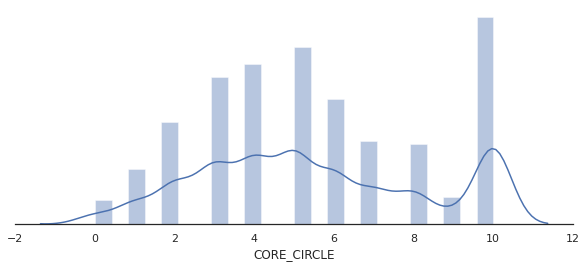

In [10]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['CORE_CIRCLE'], hist=True, rug=False).set_yticks([])
sns.despine(bottom=False, left=True)

### Supporting Others

HOW MANY PEOPLE DO YOU HELP ACHIEVE A BETTER LIFE? * ► A reflection of your altruism or selflessness (see the TED video from Matthieu Ricard 'How to let altruism be your guide') ► e.g.: caring for your family, actively supporting a friend, mentoring, coaching, developing or promoting a co-worker, ...► Over a period of 12 months.

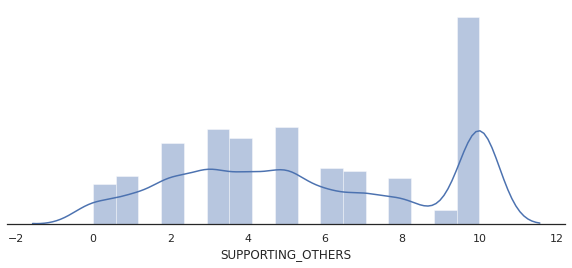

In [11]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['SUPPORTING_OTHERS'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Social Network

WITH HOW MANY PEOPLE DO YOU INTERACT WITH DURING A TYPICAL DAY? * ► True interactions and dialogues at home, at work, at the gym, ... ► Average of workdays and weekends

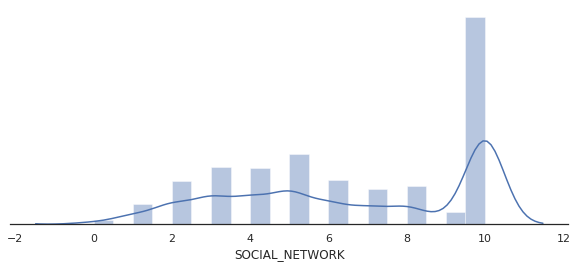

In [12]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['SOCIAL_NETWORK'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Donation

HOW MANY TIMES DO YOU DONATE YOUR TIME OR MONEY TO GOOD CAUSES? * ► Over a period of 12 months. Include financial donation, your time contribution, fundraising, volunteering, serving your country and the poor, ...

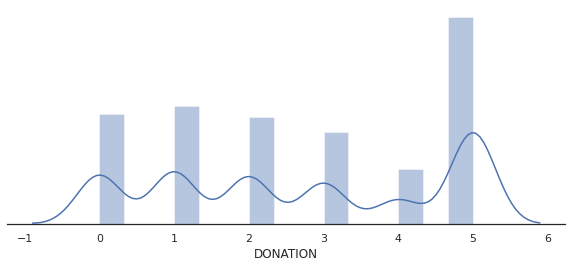

In [13]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['DONATION'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### BMI Range

WHAT IS YOUR BODY MASS INDEX (BMI) RANGE? * ► Your body mass in kg divided by the square of your height in meters ► Check the online BMI calculator such as www.cdc.gov/healthyweight/assessing/bmi/index.html. ► For instance, an adult of 6 feet and 184 pounds has a BMI of 25

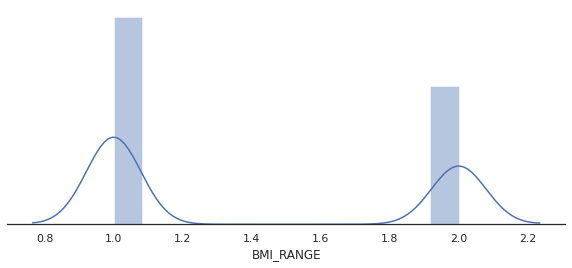

In [14]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['BMI_RANGE'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Todo Completed

HOW WELL DO YOU COMPLETE YOUR WEEKLY TO-DO LISTS? * ► Include your weekly goals, work- and personal-related tasks. ► On a scale of 0 = not at all to 10 = very well.

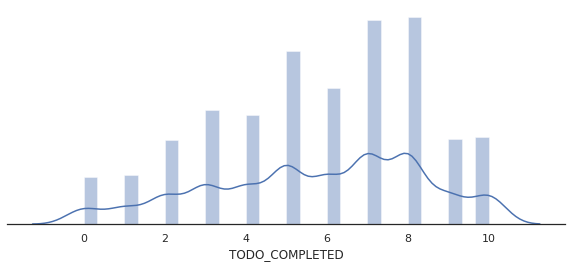

In [15]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['TODO_COMPLETED'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### FLOW

IN A TYPICAL DAY, HOW MANY HOURS DO YOU EXPERIENCE "FLOW"? * ► 'Flow' is defined as the mental state, in which you are fully immersed in performing an activity. You then experience a feeling of energized focus, full involvement, and enjoyment in the process of this activity. ►Watch the youtube video from Mihaly Csikszentmihalyi "Flow, the secret to happiness"

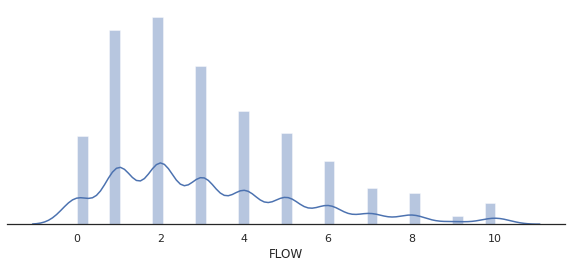

In [16]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['FLOW'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Live Vision

FOR HOW MANY YEARS AHEAD IS YOUR LIFE VISION VERY CLEAR FOR? * ► For instance, illustrated in a vision board, detailed in a personal journal or openly discussed with your spouse or close friends.

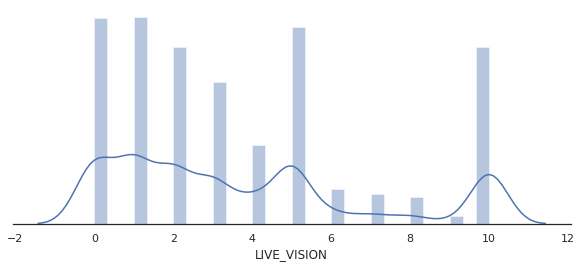

In [17]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['LIVE_VISION'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Sleep Hours

ABOUT HOW LONG DO YOU TYPICALLY SLEEP? * ► Over the course of a typical working week, including week-end

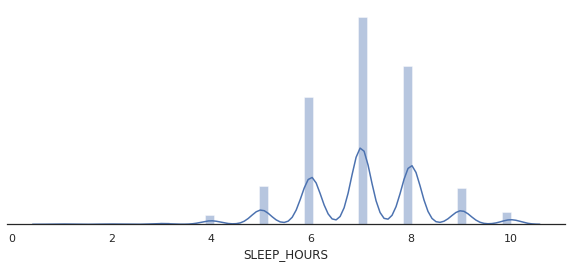

In [18]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['SLEEP_HOURS'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Lost Vacation

HOW MANY DAYS OF VACATION DO YOU TYPICALLY LOSE EVERY YEAR ? * ► Unused vacation days, lost or carried forward into the following year. ►Or because of work stress during your vacation.


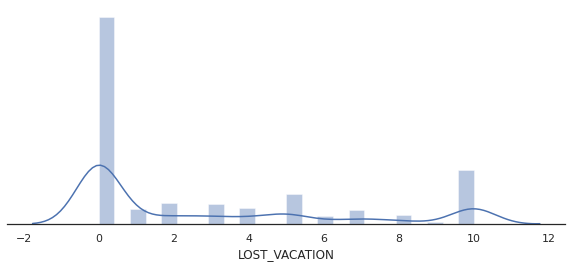

In [19]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['LOST_VACATION'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Daily Shouting

HOW OFTEN DO YOU SHOUT OR SULK AT SOMEBODY? * ► In a typical week. ► Expressing your negative emotions in an active or passive manner.

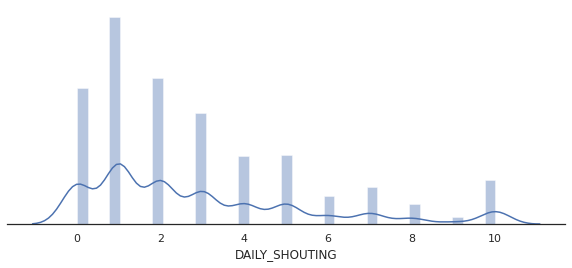

In [20]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['DAILY_SHOUTING'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Sufficient Income

HOW SUFFICIENT IS YOUR INCOME TO COVER BASIC LIFE EXPENSES? * ► Such as the costs of housing, food, health care, car and education.

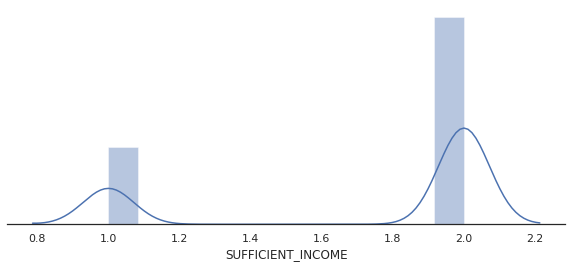

In [21]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['SUFFICIENT_INCOME'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Personal Awards

HOW MANY RECOGNITIONS HAVE YOU RECEIVED IN YOUR LIFE? * ► Significant public recognitions validating a personal level of expertise and engagement ► E.g.: diploma, degree, certificate, accreditation, award, prize, published book, presentation at major conference, medals, cups, titles...

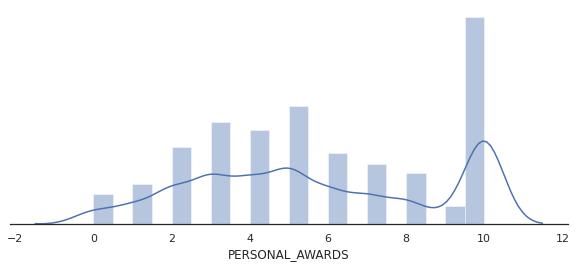

In [22]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['PERSONAL_AWARDS'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Time for Passion

HOW MANY HOURS DO YOU SPEND EVERYDAY DOING WHAT YOU ARE PASSIONATE ABOUT? * ► Daily hours spent doing what you are passionate and dreaming about, and/or contributing to a greater cause: health, education, peace, society development, ...

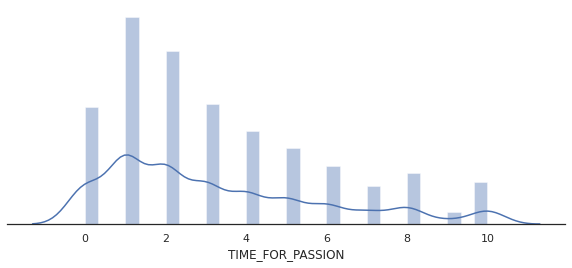

In [23]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['TIME_FOR_PASSION'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Daily Meditation

IN A TYPICAL WEEK, HOW MANY TIMES DO YOU HAVE THE OPPORTUNITY TO THINK ABOUT YOURSELF? * ► Include meditation, praying and relaxation activities such as fitness, walking in a park or lunch breaks.

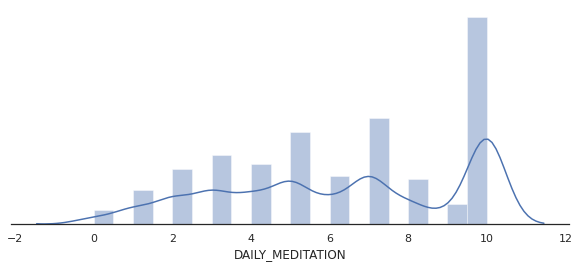

In [24]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['DAILY_MEDITATION'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Age

Changed to integer value to make corroloations easier to plot.

1 = 'Less than 20'
2 = '21 to 35'
3 = '36 to 50'
4 = '51 or more'

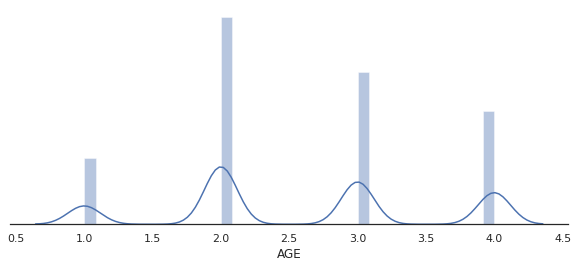

In [25]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['AGE'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Gender
1 = 'Female'
0 = 'Male'

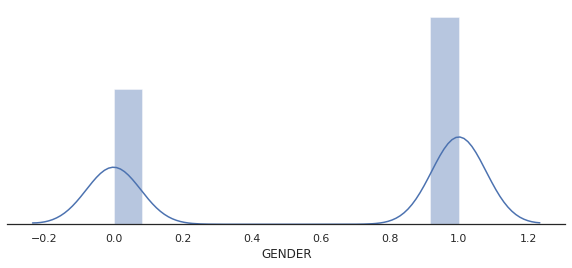

In [26]:
plt.figure(figsize=(10,4))
sns.distplot(wellbeing['GENDER'], hist=True).set_yticks([])
sns.despine(bottom=False, left=True)

### Pearson Correlation Coefficients
Below is a table containing the correlation coefficients for each variable. A score close to 1 indicates a strong, positive, linear correlation (as one goes up so does the other). A score close to -1 indicates a strong, negative correlation (as one increases the other decreases). And a score close to 0 indicates no correlation or an extremely weak one (one variables change does not impact the other in a linear fashion).

In [27]:
wellcorr = wellbeing.corr().sort_values(by=['DAILY_STRESS'])
wellcorr[['ACHIEVEMENT', 'DAILY_STRESS']]

,ACHIEVEMENT,DAILY_STRESS
DAILY_MEDITATION,0.172801,-0.213672
TODO_COMPLETED,0.309286,-0.166975
TIME_FOR_PASSION,0.373957,-0.161858
SLEEP_HOURS,0.054920,-0.152862
SUFFICIENT_INCOME,0.117023,-0.144872
FLOW,0.389727,-0.142187
LIVE_VISION,0.316496,-0.135016
PLACES_VISITED,0.264964,-0.131707
ACHIEVEMENT,1.000000,-0.120786
CORE_CIRCLE,0.292359,-0.115973


# Initial Observations:

From the places visited column I'm surprised to see such a large number of frequent travellers (those who travel 10+ times a year). As I expected, hours of sleep is a bit disturbing, the average participant isn't getting enough sleep. It's interesting to me that there is also an extremely weak linear correlation between sleep and achievement or stress, I'm curious what the next section will reveal about this. The Bimodal distribution of lost vacation time I also find sort of fascinating, it would appear that most people meticulously consume their vacation time, but there is also a large concentration of people who don't use their vacation time (maybe they feel guilty for using it, or find themselves perpetually chasing a goal that they can't stop).

# Moving on to Machine learning for interpretability

Next we want to use machine learning models to get a better picture of what impacts stress and achievement.

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

5 estimators 	R2 score is:  0.14060196284223908 	Mean Absolute Error is: 1.4378381027048208
10 estimators 	R2 score is:  0.2232572513521282 	Mean Absolute Error is: 1.3736733960538343
15 estimators 	R2 score is:  0.25778954270159143 	Mean Absolute Error is: 1.3416048172829806
20 estimators 	R2 score is:  0.27257340223702053 	Mean Absolute Error is: 1.3303444727557818
25 estimators 	R2 score is:  0.2795087669695619 	Mean Absolute Error is: 1.324782942263536
30 estimators 	R2 score is:  0.2869610391240473 	Mean Absolute Error is: 1.3177559842700943
35 estimators 	R2 score is:  0.28941815821477873 	Mean Absolute Error is: 1.3160948887591113
40 estimators 	R2 score is:  0.29126442014353016 	Mean Absolute Error is: 1.3170524514196145
45 estimators 	R2 score is:  0.2929042073645835 	Mean Absolute Error is: 1.315126156564809
50 estimators 	R2 score is:  0.29445392180726315 	Mean Absolute Error is: 1.3143616135595753
55 estimators 	R2 score is:  0.29478735724356653 	Mean Absolute Error is: 1.3

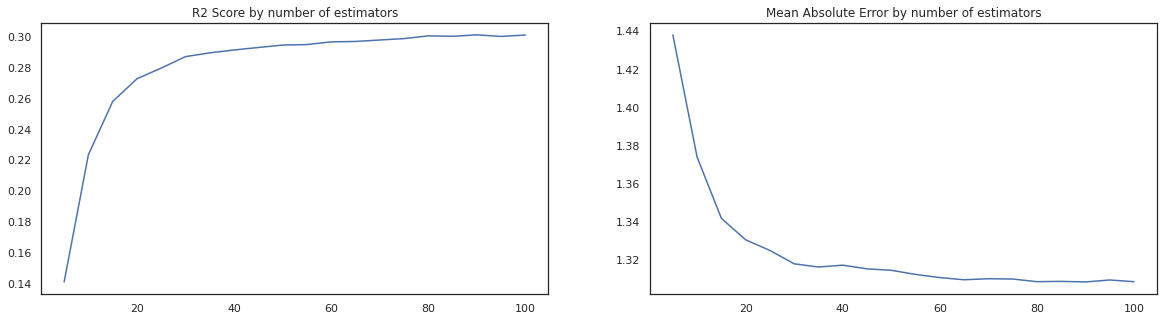

In [29]:
# An alternative method to gridsearch I was using to figure out the right hyperparameters to use
# Ultimately not as useful as I hoped

X = wellbeing.drop(['DAILY_STRESS', 'ACHIEVEMENT'], axis=1)
y = wellbeing[['DAILY_STRESS', 'ACHIEVEMENT']]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1, test_size=.2)
est_range = range(5, 105, 5)
score_graph = {'MAE Score': [],'R2 Score': [] , 'n_estimators': []}
est_list = []
score_list = []
for num in est_range:
    gbr = RandomForestRegressor(n_estimators=num, random_state=0)
    gbr.fit(train_X, train_y)
    ls_preds = gbr.predict(val_X)
    acc_1 = r2_score(val_y, ls_preds)
    score_graph['R2 Score'] = score_graph['R2 Score'] + [acc_1]
    acc_2 = mean_absolute_error(val_y, ls_preds)
    print(num ,'estimators \tR2 score is: ', acc_1,'\tMean Absolute Error is:', acc_2)
    score_graph['MAE Score'] = score_graph['MAE Score'] + [acc_2]
    score_graph['n_estimators'] = score_graph['n_estimators'] + [num]
    

fig, ax =plt.subplots(1,2, figsize=(20, 5))
ax[0].set_title('R2 Score by number of estimators')
sns.lineplot(x=score_graph['n_estimators'], y=score_graph['R2 Score'], ax=ax[0])
ax[1].set_title('Mean Absolute Error by number of estimators')
sns.lineplot(x=score_graph['n_estimators'], y=score_graph['MAE Score'], ax=ax[1]);

# Feature Importance

Below is the ranked importance of each feature in predicting the target variable, using a technique called permeation importance. Essentially permeation importance works by shuffling a column of data, retraining and evaluating the model and measuring the change in performance, then resetting and trying again on a new column. the larger the change, the more signal was lost by shuffling the data. Typically I look for (based on experience and not a firm formula) a weight of .2 or higher for a given feature.

It is worth noting that a high feature importance does not mean a linear relationship. For example if high achievers were primarily made up of two groups of people, one who rarely ate vegetables and slept 8 or more hours a day, and another group who ate tons of vegetables and slept fewer than eight hours a day. In this example both sleep and vegetable eating would have a strong impact on the model, but would have a mediocre correlation. This also means that just because there is a strong feature importance doesn't mean that it is the result of having lots of a particular thing. 


### Feature Importance for Achievement

Naturally Personal awards have a strong connection (If we look at the definitions above you will notice that the two are very similar, with Achievement being more of a lifetime score and Awards being a last 12 month score). Flow, supporting others,Time for passion,  and live vision also have a strong impact on prediction of achievement. 

In [30]:
import warnings
warnings.filterwarnings("ignore")#silences one of the warning for eli5 about a future incompatability

In [31]:
import eli5
from eli5.sklearn import PermutationImportance

my_model = RandomForestRegressor(n_estimators=100).fit(train_X, train_y)

perm = PermutationImportance(my_model, n_iter=10, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.1059 ± 0.0217,PERSONAL_AWARDS
0.0664 ± 0.0093,TIME_FOR_PASSION
0.0594 ± 0.0090,FLOW
0.0514 ± 0.0082,SUPPORTING_OTHERS
0.0421 ± 0.0069,LIVE_VISION
0.0306 ± 0.0044,DAILY_SHOUTING
0.0174 ± 0.0046,TODO_COMPLETED
0.0143 ± 0.0053,PLACES_VISITED
0.0141 ± 0.0043,CORE_CIRCLE
0.0128 ± 0.0054,DAILY_STEPS


### Feature Importance for Daily Stress

Daily shouting, lost vacation, daily meditation, gender, sleep hours, and time for passion have the strongest impact on the model.

In [32]:
X = wellbeing.drop(['DAILY_STRESS'], axis=1)
y = wellbeing['DAILY_STRESS']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1, test_size=.2)
my_model = RandomForestRegressor(n_estimators=100).fit(train_X, train_y)

perm = PermutationImportance(my_model, n_iter=10, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1489 ± 0.0170,DAILY_SHOUTING
0.0628 ± 0.0144,LOST_VACATION
0.0489 ± 0.0070,DAILY_MEDITATION
0.0291 ± 0.0057,GENDER
0.0230 ± 0.0064,TIME_FOR_PASSION
0.0222 ± 0.0055,SLEEP_HOURS
0.0134 ± 0.0035,PLACES_VISITED
0.0132 ± 0.0062,LIVE_VISION
0.0132 ± 0.0041,SUPPORTING_OTHERS
0.0128 ± 0.0072,SUFFICIENT_INCOME


### Feature importance when predicting both

We have some solid feature importance from personal awards, flow, time for passion, supporting others, live vision, and daily shouting. 


In [33]:
X = wellbeing.drop(['DAILY_STRESS', 'ACHIEVEMENT'], axis=1)
y = wellbeing[['DAILY_STRESS', 'ACHIEVEMENT']]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1, test_size=.2)
my_model = RandomForestRegressor(n_estimators=100).fit(train_X, train_y)

perm = PermutationImportance(my_model, n_iter=10, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1072 ± 0.0187,PERSONAL_AWARDS
0.0650 ± 0.0089,FLOW
0.0615 ± 0.0098,TIME_FOR_PASSION
0.0526 ± 0.0087,SUPPORTING_OTHERS
0.0431 ± 0.0094,LIVE_VISION
0.0287 ± 0.0055,DAILY_SHOUTING
0.0197 ± 0.0052,TODO_COMPLETED
0.0170 ± 0.0033,PLACES_VISITED
0.0141 ± 0.0046,DAILY_MEDITATION
0.0136 ± 0.0035,CORE_CIRCLE


# Predicting Stress and Achievement:
Below is a function to predict your level of stress and achievement. You will need to run the notebook to see your answers. For a link to a simple script with just this function see: https://www.kaggle.com/schorsi/stress-and-achievement-ml-predictor

The model isn't as accurate as I would like, but you may still find it interesting. I encourage you to run this section a few times and try modifying your answers a little to see the impact on your predictions. Could you significantly lower your stress by getting an extra hour of sleep each night? Should you consider working more time for introspection into your day? Would you be more successful if you took more vacation time?

* Fruit and Veggies: number of servings per day, enter 5 if 5 or more
* Places Visited: 1 to 10
* Core Circle: 1 to 10
* Supporting Others: 1 to 10
* Social Network: 1 to 10
* Donations: 1 to 5
* BMI Range: 1 = below 25, 2 = above 25
* ToDo Completed: 1 to 10
* Flow: 1 to 10
* Daily Steps: 1 to 10 (Thousands)
* Live Vision: 1 to 10
* Sleep Hours: 1 to 10
* Lost Vacation: 1 to 10
* Daily Shouting: 1 to 10
* Sufficient Income: 1 = insufficient, 2 = sufficient
* Personal Awards: 1 to 10
* Time For Passion: 1 to 10
* Daily Meditation: 1 to 10
* Age: 1 = 'Less than 20', 2 = '21 to 35', 3 = '36 to 50', 4 = '51 or more'
* Gender: 0 is male, 1 is female

In [34]:
_ = X.columns
df_pred = {}
print('For each of the following enter an integer value representing your answer to the survey questions')
for col in _:
    print('\n',col, end='\t')
    df_pred[col] = [int(input())]

df = pd.DataFrame.from_dict(df_pred, orient='columns')
df

For each of the following enter an integer value representing your answer to the survey questions

 FRUITS_VEGGIES	

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

In [35]:
_ = my_model.predict(df)
print('Prediction of Daily Stress: ', float(_[:,0]), "\t\tPrediction for Achievement: ", float(_[:,1]))

NameError: name 'df' is not defined


 # Final Thoughts:

The highlighted features paint an interesting picture of what a high achieving, stress free life is like. I find myself curious about which are causes and which are effects in this dataset. Does stress lead into shouting, or does shouting lead to stress, or does one feed the other as an endless cycle.

There are a couple opportunities for improvements. The value of the outputs of the random forest might have been more useful if I had managed to get a more accurate model. It might have been interesting to add a day of the week feature to the dataset and see if there were any interesting trends.

This year I've challenged myself to complete one task on Kaggle per week, in order to develop a larger Data Science portfolio. If you found this notebook useful or interesting please give it an upvote. I'm always open to constructive feedback. If you have any questions, comments, concerns, or if you would like to collaborate on a future task of the week feel free to leave a comment here or message me directly. 
